# Olympic Capstone Project

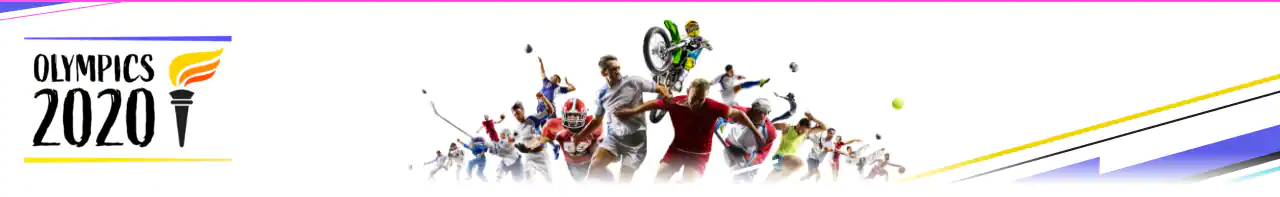

# Introduction

The Olympics are regarded as a major athletic event in which thousands of competitors from all over the world compete in a range of events. Nations from all over the world compete, and the Olympic games are often regarded as the world's most popular sporting event. Data Science and Machine Learning techniques will be of significant assistance in the decision-making processes of trainers, players, and governments in these countries.

The findings may be used to highlight the need for new policies to increase the quality of physical education in a country. According to the data, a variety of factors contribute to these countries' performance in the games.

The following dataset contains information about olympic events that occurred between 2000 and 2012. Summer and winter olympic sports are also included. The dataset has a total of ten features. There are 8618 observations. 

    Players' names, ages, countries, medal types, and total medals earned are all included in the data collection.
    The dataset also assume Madel won in group sports also as individual Medal for each player.

    A single player can play many games.

    Year - The year in which a certain olympic event took place.

    Date Given - The date on which a sporting event will take place.

    Same A player can compete in a number of Olympic events.


## Step 2 (Python and DS): Read the dataset in pandas and perform the steps as suggested.

1. Please do the basic exploration of the data. (Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.)
2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.
3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.
4. Please remove special characters from the name column.
5. Perform data visualization techniques to appropriate columns and explain them.  
6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.
7. Please perform appropriate numerical measures on each column and report them accordingly.
8. Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

## Step 3 (PySpark): Once u have done the data cleaning please convert the pandas dataframe to pyspark dataframe and do the following transformation

1. Write PySpark code to read olympix_data.csv file
2. Write PySpark code to print the Olympic Sports/games in the dataset.
3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game
4. Sort the result based on the total number of medals.
5. Find the total number of medals won by each country in swimming.
6. Find the total number of medals won by each country in Skeleton.
7. Find the number of medals that the US won yearly.
8. Find the total number of medals won by each country.
9. Who was the oldest athlete in the olympics? 
10. Which country was he/she from?

### Import Dependecies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotiing
import seaborn as sns #plotiing
import missingno as msno # missing value
%matplotlib inline
plt.style.use('dark_background')

## Loading data from a CSV file(s):

In [2]:
file_location ='/kaggle/input/olympic/olympic.csv'# filepath
olympic=pd.read_csv(file_location)# reading data

## Dimension of data

In [3]:
olympic.shape# shape of data

## Overview of the data

In [4]:
olympic.head(3)#Print first three observations

In [5]:
olympic.tail(3)#Print last three observations

## Identify variables

In [6]:
olympic.dtypes# data types

In [7]:
olympic['Date_Given']=olympic['Date_Given'].str.replace('/','-')#inconsistent date so bring in single format
olympic['Date_Given'] = olympic['Date_Given'].astype('datetime64[ns]')# changing to appriopate data types
olympic['year'] = olympic['year'].astype('category')# changing to appriopate data types
olympic['country'] = olympic['country'].astype('category')# changing to appriopate data types
olympic['sports'] = olympic['sports'].astype('category')# changing to appriopate data types

Observation
----------------------------------------------------

|              | Earlier        |Later
|:-------------|:---------------|:---------------|
| name         | object         | object         |
| age          | float64        | float64        |
| country      | category       | category       |
| year         | int64          | category       |
| Date_Given   | object         | datetime64[ns] |
| sports       | object         | category       |
| gold_medal   | int64          | int64          |
| silver_medal | int64          | int64          |
| brone_medal  | int64          | int64          |
| total_medal  | int64          | int64          |

# 1. Please do the basic exploration of the data.

## Missing Value in Dataset

In [8]:
print("Number of missing value in dataset")
olympic.isnull().sum()#sum of missing value

In [9]:
msno.bar(olympic)# plotting missing values

5 null values in name and age column

## Duplicate Value in DataSet

In [10]:
print("Number of duplicated value in dataset")
olympic.duplicated().sum()#sum of duplicated value

3 duplicate values

### Dividing DataSet Based on Winter and  Summer (for exploration purpose)

In [11]:
df1=olympic.copy(deep=True)# making duplicated copy

In [12]:
df1['month'] = df1['Date_Given'].dt.month# extracting month because winter olympic occur on februry 
df1['season'] = np.where(df1['month']== 2, 'winter', 'summer')# new column based on condition

In [13]:
summer=df1[df1['season']=='summer']# filter dataset
winter=df1[df1['season']=='winter']# filter dataset

In [14]:
def summer_olympic(year):# filter dataset baed on year
    return summer[summer['year']==year]

### Distribution of player in each olympic

# 2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

In [15]:
summer_2000=summer_olympic(2000)
summer_2004=summer_olympic(2004)
summer_2008=summer_olympic(2008)
summer_2012=summer_olympic(2012)
print('olympic:' ,'Skewness_of_Age', 'Dimensions','Missing Values')
print('summer      :',summer['age'].skew().round(1),summer.shape,summer['age'].isnull().sum())
print('summer 2000 :',summer_2000['age'].skew().round(1),summer_2000.shape,summer_2000['age'].isnull().sum())
print('summer 2004 :',summer_2004['age'].skew().round(1),summer_2004.shape,summer_2004['age'].isnull().sum())
print('summer 2008 :',summer_2008['age'].skew().round(1),summer_2008.shape,summer_2008['age'].isnull().sum())
print('summer 2012 :',summer_2012['age'].skew().round(1),summer_2012.shape,summer_2012['age'].isnull().sum())

Observation:
------------------------------
We can see that all missing values are present in 2012 summer olympic games.Also this is one of event where overall  Skewness is greater as compare to other.SO, if we somehow know the reason , we can deal missing value and skewneww effectively. 

In [16]:
olympic.index[olympic.isnull().any(axis=1)]# null values in dataset based filter 

Observation :
---------------------------------

we can see that indexes at which missing value present in dataset.Lets check it.

Index= [1428, 1429, 1430, 4485, 4486]

In [17]:
olympic[1428:1431]#Indexes at which missing values are present

In [18]:
olympic[4485:4487]#Indexes at which missing values are present

In [19]:
olympic=olympic.dropna()# removing null values

Observation
----------------------------------------------

So we can see that missing value basically present in sports game.
Both name and row are absent we can not able to identify it even if we try to impute missing value present in age column.I going to just drop this value. 

# 3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.

In [20]:
summer_2012[summer_2012['country']=='Argentina']

Observation
-----------------------------------
Medal from sports game count as one medal for One nation but here we can see that medal are display for each player, theis can lead to biasness in our approach.But for sake of simplicity , I am not going to deal with it.

In [21]:
olympic=olympic.drop_duplicates()# drping duplicate values

Observation
--------------------------------------
we already new that both missing value and duplicate pointing on same row ans also lack majoe atribute and part of team game. So ,dropping this row is effective in two way.First it leads to decrease in bias by droping duplicate value and also handling of missing value.  

## 4. Please remove special characters from the name column.

In [22]:
# pip install Unidecode 
import unidecode # import unidecode
import re
def chr_change(text):# cleaning function
    result=unidecode.unidecode(text)
    re.sub(r"\W+|_", " ", result)
    return result

olympic["New_name"] = olympic["name"].str.replace(r"[\W+|_]", " ")# except alphabet everyhtng lese removed
olympic["New_name"]=olympic["New_name"].apply(chr_change)# apply clean function

# 5. Perform data visualization techniques to appropriate columns and explain them. 

In [23]:
total_cont=df1['season'].value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Season" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0))
fig.suptitle('Distribution of WInter and Summer Olympic in Dataset',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])

plt.style.use('dark_background')
plt.show()


In [24]:
# distribution of player in each olympic
total_cont=df1.year.value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Olympic" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0,0,0,0,0,0,0))
fig.suptitle('Distribution of Olympic Year Wise',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])

plt.style.use('dark_background')
plt.show()

In [25]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="gold_medal", x="year", data=df1)
sns.set_style("dark")

In [26]:
df1.groupby('country').agg({'name':'nunique','total_medal':'sum'}).sort_values(by='total_medal',ascending=False)[:25].plot(kind='bar',figsize=(20,10),title='Number of Player vis Number of Total Medal Per Country')
sns.set_style("dark")

In [27]:
df1.groupby(['sports']).size().sort_values(ascending=True).plot(kind = "barh",figsize=(20, 15),title='Distribution Of Sports')# horizontal bar plot
sns.set_style("dark")

# 6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})# figure size
sns.set_theme(style="whitegrid")
sns.histplot(olympic['age'], kde=True, color='red', bins=30)# histogram plot
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=olympic['age'].mean(),color='green',label='mean')# mean line
plt.axvline(x=olympic['age'].median(),color='blue',ls='--',lw=2.5,label='medain')# medain line
plt.legend();

age data is right skewed.

In [29]:
olympic['age'].skew()# skewnwss

In [30]:
print('Skewness in Summmer Game in Age Attribute :',summer['age'].skew())# skewnwss
print('Skewness in Summmer Game in Age Attribute :',winter['age'].skew())# skewnwss

Observation
------------------------------------------

- Summer olympic age attribur age is moderately skewed.Because If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
- Winter olympic age attribur age is fairly symmetrical.Because If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

In [31]:
# istogram and density plot 
ax=sns.displot(
    olympic, x="age", col="year",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),col_wrap=3,discrete=True,stat="frequency"
)
for axis in ax.axes.flat:
    axis.tick_params(labelleft=True)
    axis.tick_params(labelbottom=True)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure
ax.fig.suptitle('Distribtion of Age in different Year')

Observation:
------------------------------------------
2008 and 2012 year has most skeweed and lot of outlier on tail side.

In [32]:
summer_2008[summer_2008['age']>=45]# grater than 45 filter

Observation
--------------------------------
Now its time to check reason behind skewnness in dataset.So , we got our reason behind it. Basically two sports Equestrian and Archery may be behing overall skewness of dataset.
Another natural question came to mind , why average age of Equestrian players is more as compare to other.Than I found this ,
What is the average age of equestrian riders? With a median age of 36, equestrians are the oldest Olympians. More sedate sports also tend to have older athletes; golf and shooting are near the top of the list.
So,Eqestrain can behave as outlier in our dataset.we had to came up with effective streatgy to deal with it.


In [33]:
olympic[olympic['sports']=='Equestrian']['total_medal'].sum()#sum of medal with condition

Observation
--------------------------------
Next thing came in  my why can not we just delete it.But we can not when I found that Equestran sports overall gain 182 medals in this olympic.It can lead to huge data loose.SO, we had to go with another affective approach.

In [34]:
olympic[olympic['sports']!='Equestrian']['age'].skew()#skewness with condition

Observation
--------------------------------

I try to check skewness without equestrian .So it lead to huge decrease in skewness in our dataset.So, we also found it our culprit for skewness also.But we can not delete it. 
Skewness Result Interpretaion - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

## Transformation on Age Column

In [35]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(olympic['age'], kde=True, color='red', bins=8,ax=ax[0]) #Age
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(np.log(olympic['age']), kde=True, color='green', bins=8,ax=ax[1]) #log transformed Age 
plt.title('Age Distribution After Log Transformation', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Box Plot for 5-point summary , distribution and outliers

fig, ax = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('BOX PLOTS')

sns.boxplot(data = olympic ,y=olympic['age'], color='red',ax=ax[0]) #Age
plt.title('Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

sns.boxplot(data = olympic ,y=np.log(olympic['age']), color='green',ax=ax[1]) #log transformed Age  
plt.title('log transformed Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

## 7. Please perform appropriate numerical measures on each column and report them accordingly.

### Statistical Summary of Each Features

In [36]:
olympic.describe().round(0)# statistical summary of nummerical varriable and rounding of float values to zero

In [37]:
olympic.describe(include='object')# statistical summary of categorical  varriables

# Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [38]:
total_cont=olympic.groupby('country')['total_medal'].sum().nlargest(10)# group by country and sum with top 10
label=total_cont.index
values=total_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Total medal',).set_size(20)# main title
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')# background
plt.show()

In [39]:
gold_cont=olympic.groupby('country')['gold_medal'].sum().nlargest(10)# group by country and sum with top 10
label=gold_cont.index
values=gold_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Gold medal',).set_size(20)# title
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

In [40]:
silv_cont=olympic.groupby('country')['silver_medal'].sum().nlargest(10) # group by country and sum with top 10
label=silv_cont.index
values=silv_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Silver Medal',).set_size(20)# main title
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

In [41]:
bronze_cont=olympic.groupby('country')['brone_medal'].sum().nlargest(10) # group by country and sum with top 10

label=bronze_cont.index
values=bronze_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Bronze medal',).set_size(20)# main title
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

In [42]:
olympic.to_csv('new_olympic.csv',index=False)# final output after cleaning 

# Pyspark

In [43]:
!pip install pyspark # installing pyspark framework

In [44]:
#creating pyspark session
from pyspark import SparkConf
from pyspark.sql import SparkSession
#importing pyspark sql function
from pyspark.sql.functions import sum, col, desc, asc, count

In [45]:
#bulding pyspark app
spark = SparkSession.builder.appName("practice").getOrCreate()
spark.sparkContext.getConf().getAll();

1. Write PySpark code to read olympix_data.csv file
2. Write PySpark code to print the Olympic Sports/games in the dataset.
3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game
4. Sort the result based on the total number of medals.
5. Find the total number of medals won by each country in swimming.
6. Find the total number of medals won by each country in Skeleton.
7. Find the number of medals that the US won yearly.
8. Find the total number of medals won by each country.
9. Who was the oldest athlete in the olympics? 
10. Which country was he/she from?

# Write PySpark code to read olympix_data.csv file

In [46]:
df = spark.read.csv(file_location,header=True,inferSchema='True') # reading fil ewith help of pyspark 

In [47]:
# reading panda datafram with pyspark 
sparkDF=spark.createDataFrame(olympic) 
# schema of pyspark
sparkDF.printSchema()
# first five row of pyspark dataframe
sparkDF.show()

# Write PySpark code to print the Olympic Sports/games in the dataset.

In [48]:
#dinsticnt sports in dataframe
sparkDF.select('sports').distinct().show()

# 3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [49]:
# groupby sports than performing aggregate function on total medals and than arranging in descending order

sport_medal=sparkDF.groupBy("sports") \
    .agg(sum("total_medal").alias("Total")) \
    .sort(desc("Total"))

In [50]:
#conering resunltant to panda for plotting purpose
plot_sport_medal=sport_medal.toPandas()
plot_sport_medal

In [51]:
# plotting with help of ploty
import plotly.express as px
fig = px.treemap(plot_sport_medal, 
                 path=["sports","Total"],
                 values=plot_sport_medal["Total"],
                 color='sports',width=1400, height=1600
                )

fig.update_layout(
    uniformtext=dict(minsize=10, mode='show'),
    margin = dict(t=50, l=25, r=25, b=25),
    title_text = 'Total Medals in Each Sports',
    title_font_family="Arial",
    title_font_size = 22,
    title_font_color="black",
    title_x=0.5,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# Find the total number of medals won by each country in swimming and skelton ?

In [52]:
#groupby sports and country and than aggeregation
sp_count_TOt=sparkDF.groupby('sports','country').agg(sum("total_medal").alias("Total")).sort(desc("Total"))

In [58]:
#filter datafram based upon swimming and skelton
sp_count_TOt.filter(sp_count_TOt['sports']=='Swimming').show()
sp_count_TOt.filter(sp_count_TOt['sports']=='Skeleton').show()

# Find the number of medals that the US won yearly.

In [54]:
# filter by country than groupby by year and country , after this aggergation on total number of medals
sparkDF.filter(sparkDF['country']=='United States').groupby('year','country').agg(sum("total_medal").alias("Total")).sort(desc("year")).show()

# Find the total number of medals won by each country.

In [55]:
# group by operation on country and aggeregation on total medals
sparkDF.groupby('country').agg(sum("total_medal").alias("Total")).sort(desc("Total")).show()

# Who was the oldest athlete in the olympics? Which country was he/she from?

In [56]:
# group by country , player name and age , after it max age and sort it by age
OLd_ath=sparkDF.groupby('New_name','country','age').max('age').sort(desc("max(age)")).limit(1)
OLd_ath.select('New_name','country','age').show()